# Jupiter Notebook 
## for training of simple classifiers and interpretability methods

In [1]:
# load dataset into a pandas DataFrame
import pandas as pd
df = pd.read_csv("depression_detection_features.csv")
df.head()

,depression_label,frequency_of_speech,mean_length_of_speech,mean_word_length,flair_sentiment,flair_score,average_frequency_nouns,average_frequency_verbs,average_frequency_adjectives,average_frequency_adverbs,average_frequency_firstperson,speech_speed,unique_word_count,stop_word_frequency
0,0,77,4.181818,4.068323,0,0.898453,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,0,72,19.430556,3.961401,1,0.830033,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,0,99,6.151515,4.096880,1,0.613937,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,0,94,20.382979,3.914927,1,0.989942,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,0,80,12.400000,4.021169,0,0.990270,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611


In [2]:
df.columns

Index(['depression_label', 'frequency_of_speech', 'mean_length_of_speech',
       'mean_word_length', 'flair_sentiment', 'flair_score',
       'average_frequency_nouns', 'average_frequency_verbs',
       'average_frequency_adjectives', 'average_frequency_adverbs',
       'average_frequency_firstperson', 'speech_speed', 'unique_word_count',
       'stop_word_frequency'],
      dtype='object')

In [3]:
df = df.drop(columns=['frequency_of_speech', 'flair_score', 'mean_length_of_speech'])

In [4]:
# Check the total size of the dataset
df.shape

(219, 11)

In [5]:
# Check variable types
df.dtypes

depression_label                   int64
mean_word_length                 float64
flair_sentiment                    int64
average_frequency_nouns          float64
average_frequency_verbs          float64
average_frequency_adjectives     float64
average_frequency_adverbs        float64
average_frequency_firstperson    float64
speech_speed                     float64
unique_word_count                  int64
stop_word_frequency                int64
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

depression_label                 0
mean_word_length                 0
flair_sentiment                  0
average_frequency_nouns          0
average_frequency_verbs          0
average_frequency_adjectives     0
average_frequency_adverbs        0
average_frequency_firstperson    0
speech_speed                     0
unique_word_count                0
stop_word_frequency              0
dtype: int64

# Checking for correlations

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

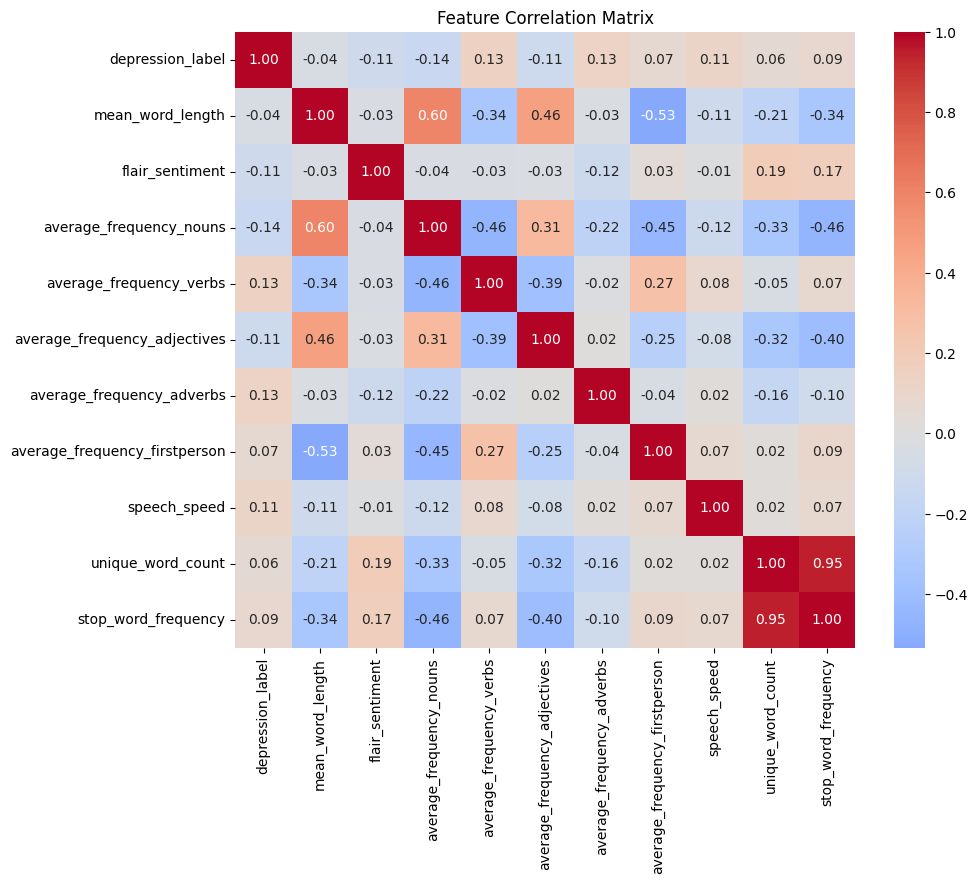

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Preparing the data for ML classification

Input features
- mean_word_length
- flair_sentiment
- average_frequency_nouns
- average_frequency_verbs
- average_frequency_adjectives
- average_frequency_adverbs
- average_frequency_firstperson
- speech_speed
- unique_word_count
- stop_word_frequency

Binary target class (could be changed, having different categories for depresion)
- depression_label (0 for no depression, 1 for depression)

In [9]:
import numpy as np

# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)

In [10]:
# Convert DataFrame to numpy array
numpy_array = df.values
print(numpy_array)

[[0.00000000e+00 4.06832298e+00 0.00000000e+00 ... 4.23795736e-01
  1.73000000e+02 1.74000000e+02]
 [0.00000000e+00 3.96140100e+00 1.00000000e+00 ... 1.05848528e+00
  3.64000000e+02 9.07000000e+02]
 [0.00000000e+00 4.09688013e+00 1.00000000e+00 ... 6.25064149e-01
  2.86000000e+02 3.30000000e+02]
 ...
 [0.00000000e+00 4.26824034e+00 0.00000000e+00 ... 2.70615563e+00
  2.15000000e+02 2.60000000e+02]
 [0.00000000e+00 3.97352587e+00 0.00000000e+00 ... 2.66859345e+00
  3.20000000e+02 4.97000000e+02]
 [0.00000000e+00 3.89512555e+00 0.00000000e+00 ... 6.65879807e-01
  2.70000000e+02 4.22000000e+02]]


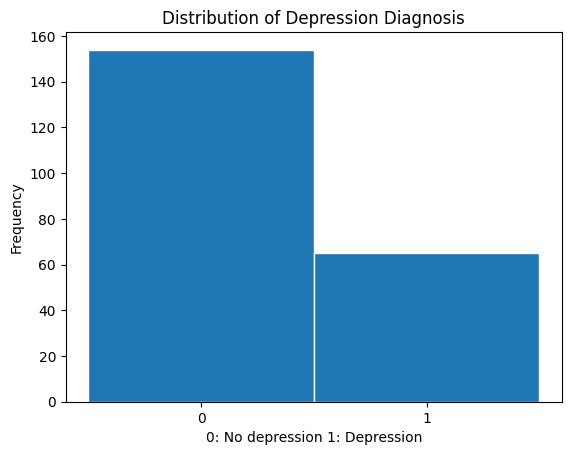

In [11]:
target_column = 'depression_label'

# Histogram for target class
plt.hist(df[target_column], bins=[-0.5, 0.5, 1.5], edgecolor='white')
plt.title('Distribution of Depression Diagnosis')
plt.xlabel('0: No depression 1: Depression')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Set x-ticks to show only 0 and 1
plt.show()

In [12]:
# Check for class imbalance
print(df[target_column].value_counts())

depression_label
0    154
1     65
Name: count, dtype: int64


In [13]:
# Code that separates data into features X and target variable y
X_array = df.drop([target_column], axis=1).values
y_array = df[target_column].values

### Stratified train-test partitioning
- generate X_train, X_test, y_train, y_test maintaining 20% in the test set
- additionally generate X_train_norm, X_test_norm for KNN and SVM classifier

*Explanation* of stratified train-test partitioning and its advantages:
- Stratified train-test partitioning involves splitting the dataset into train and test sets while maintaining the proportion of classes in each subset similar to that in the original dataset. 
- This is beneficial for datasets with unequal distribution ensuring both sets represent the class distribution accurately and improving model training and evaluation on minority classes.

In [14]:
from sklearn.model_selection import train_test_split

# Perform stratified train-test split with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X_array, 
                                                    y_array, 
                                                    test_size=0.2, 
                                                    stratify=y_array, 
                                                    random_state=RANDOM_SEED)

### Model training

In [15]:
# Libraries for Cross-Validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

In [16]:
# Define cross-validation with StratifiedKFold (ensuring consistent splits)
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [17]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

### XGBoost


In [18]:
import xgboost as xgb

In [19]:
# Calculate the ratio of the minority class to the majority class
class_counts = np.bincount(y_train)  # Count the occurrences of each class
majority_class_count = class_counts.max()  # Number of samples in the majority class
minority_class_count = class_counts.min()  # Number of samples in the minority class

# Calculate scale_pos_weight (ratio of minority class to majority class)
scale_pos_weight = majority_class_count / minority_class_count

In [20]:
# Define the model
xgboost = xgb.XGBClassifier(eval_metric='mlogloss', 
                            use_label_encoder=False,
                            random_state=RANDOM_SEED,  # Ensure reproducibility in model initialization 
                            scale_pos_weight=scale_pos_weight)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [25, 35, 50, 75, 100, 150, 200],  # number of boosting rounds
    'max_depth': [2, 5, 10, 15, 20],  # maximum depth of each tree
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]  # learning rate (step size)
}

# Set up GridSearchCV with cross-validation for XGBoost
grid_search_xgb = GridSearchCV(xgboost, param_grid=param_grid_xgb, cv=cv_folds, scoring=scoring, refit='f1')
grid_search_xgb.fit(X_train, y_train)

# Output the best parameters based on F1 score and display all metrics
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# View the scores for all metrics (like accuracy, f1, etc.)
cv_results = grid_search_xgb.cv_results_
for metric in ['accuracy', 'f1', 'roc_auc']:
    best_index = grid_search_xgb.best_index_
    print(f"Best {metric.capitalize()} for XGBoost:", cv_results[f'mean_test_{metric}'][best_index])

c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200}
Best Accuracy for XGBoost: 0.6742857142857142
Best F1 for XGBoost: 0.37478991596638656
Best Roc_auc for XGBoost: 0.6158424242424243


In [21]:
# Get the best estimator (model with the best parameters)
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for XGBoost:", accuracy)

# Generate classification report
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred))

Test Accuracy for XGBoost: 0.6363636363636364

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        31
           1       0.38      0.38      0.38        13

    accuracy                           0.64        44
   macro avg       0.56      0.56      0.56        44
weighted avg       0.64      0.64      0.64        44



Explainability techniques

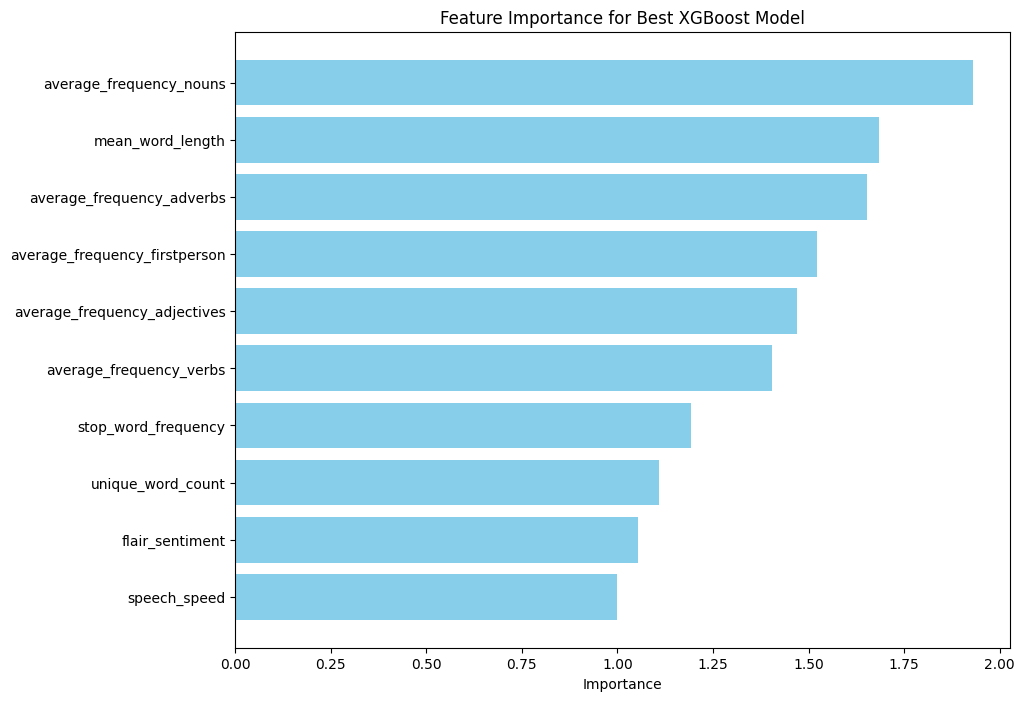

In [22]:
# Feature Importance XGBoost
# Manually defined feature names
feature_names = ['mean_word_length', 'flair_sentiment', 'average_frequency_nouns', 'average_frequency_verbs', 'average_frequency_adjectives', 'average_frequency_adverbs', 'average_frequency_firstperson', 'speech_speed', 'unique_word_count', 'stop_word_frequency']

# Extract feature importances using gain metric
booster = best_xgb_model.get_booster()
feature_importances = booster.get_score(importance_type='gain')

# Map feature importances to the feature names
importance_df = pd.DataFrame({
    'Feature': [feature_names[int(f[1:])] for f in feature_importances.keys()],  # Map f0, f1, ... to names
    'Importance': feature_importances.values()
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance for Best XGBoost Model")
plt.gca().invert_yaxis()  # Flip the chart so the most important feature is at the top
plt.show()

c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


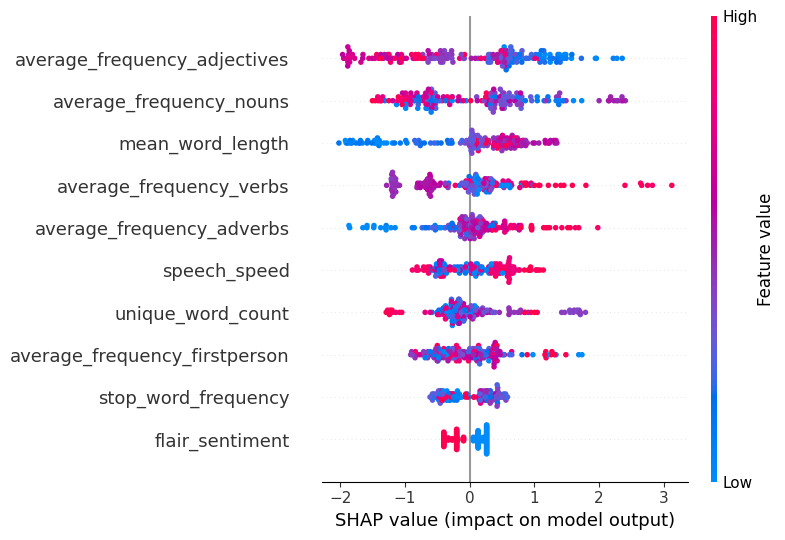

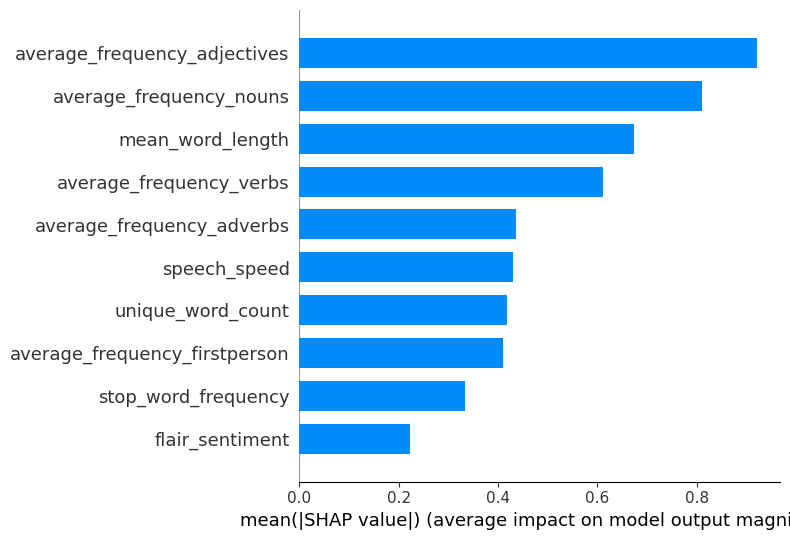

In [23]:
# Global Interpretability with SHAP
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(best_xgb_model, X_train)

# Compute SHAP values
shap_values = explainer(X_train)

# Summary plot to visualize global feature impact
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

# Bar plot for average feature importance (global view)
shap.summary_plot(shap_values, X_train, feature_names=feature_names, plot_type='bar')

In [24]:
shap.initjs()

In [25]:
# Local Interpretability with SHAP
# Explain a single prediction
index = 10  # Example: Explain the prediction for the 10th test sample
shap.force_plot(explainer.expected_value, shap_values[index].values, X_test[index], feature_names=feature_names)

In [34]:
# Define the sigmoid function to convert log-odds to probabilities
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply sigmoid transformation to the expected value to get the probability
expected_probability = sigmoid(explainer.expected_value)

# Apply sigmoid transformation to the SHAP values to get probabilities
shap_probabilities = sigmoid(shap_values[index].values)

# Determine the final predicted class for the 10th sample (0 or 1)
# Class prediction is based on the probability threshold (typically 0.5)
final_probability = expected_probability + sum(shap_probabilities)  # Adding all feature contributions to the baseline probability
predicted_class = 1 if final_probability >= 0.5 else 0  # Predict class based on threshold (0.5)

Predicted Class (0 = No Depression, 1 = Depression): 1
Final probability: 5.174336693509589


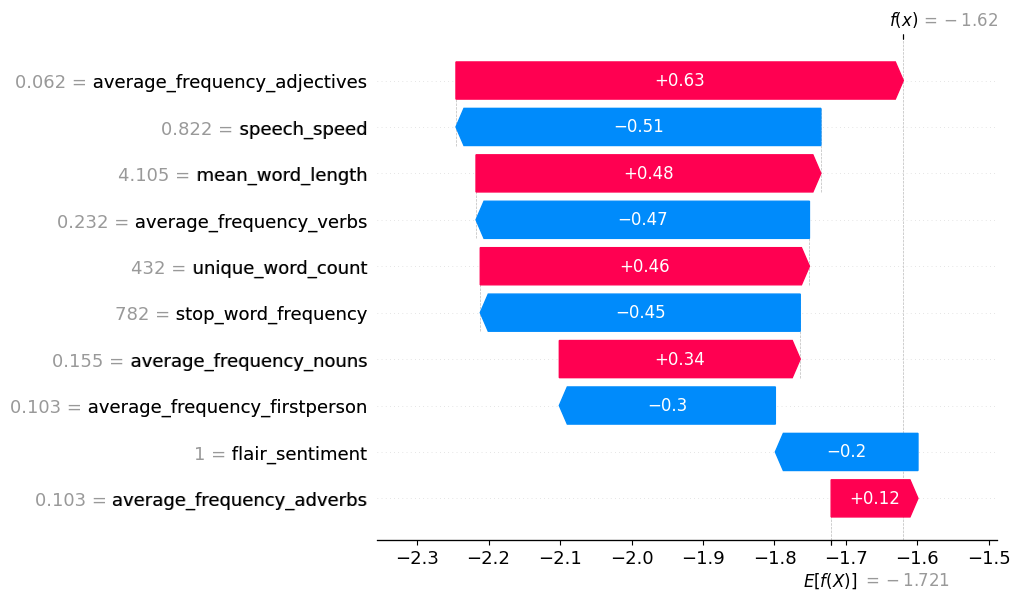

In [36]:
# Print the predicted class and corresponding probability for interpretation
print(f"Predicted Class (0 = No Depression, 1 = Depression): {predicted_class}")
print("Final probability:",final_probability)
shap_values.feature_names = feature_names
shap.plots.waterfall(shap_values[index])

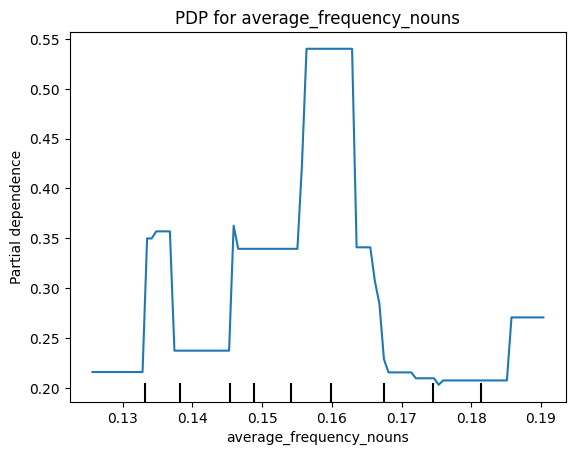

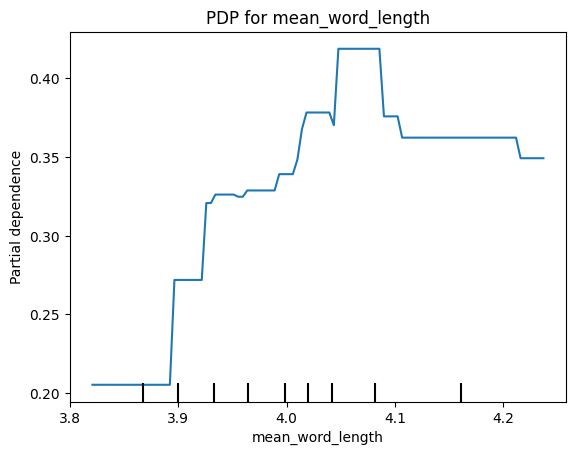

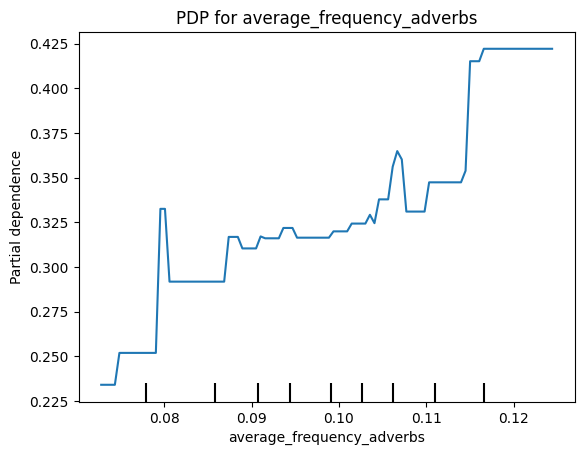

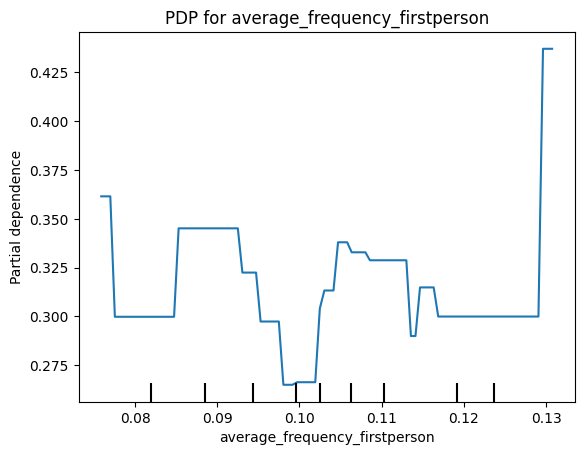

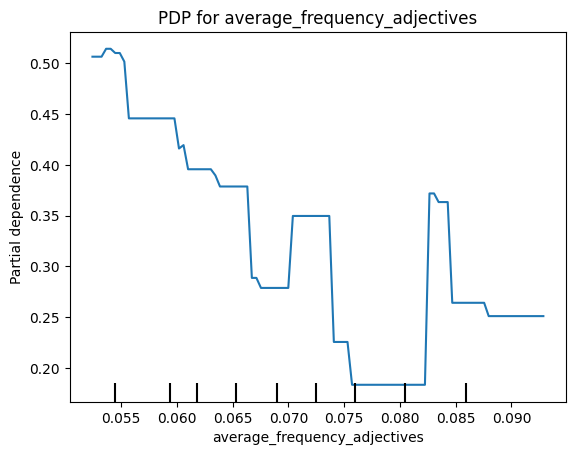

In [28]:
# Combine SHAP with Partial Dependence Plots (PDPs)

# Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Get the top N features (e.g., top 5)
top_features = importance_df["Feature"].head(5).tolist()

# Generate PDP plots for the top features
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

for feature in top_features:
    # Plot PDP for each top feature
    PartialDependenceDisplay.from_estimator(
        best_xgb_model, X_train, [feature], feature_names=feature_names
    )
    plt.title(f"PDP for {feature}")
    plt.show()

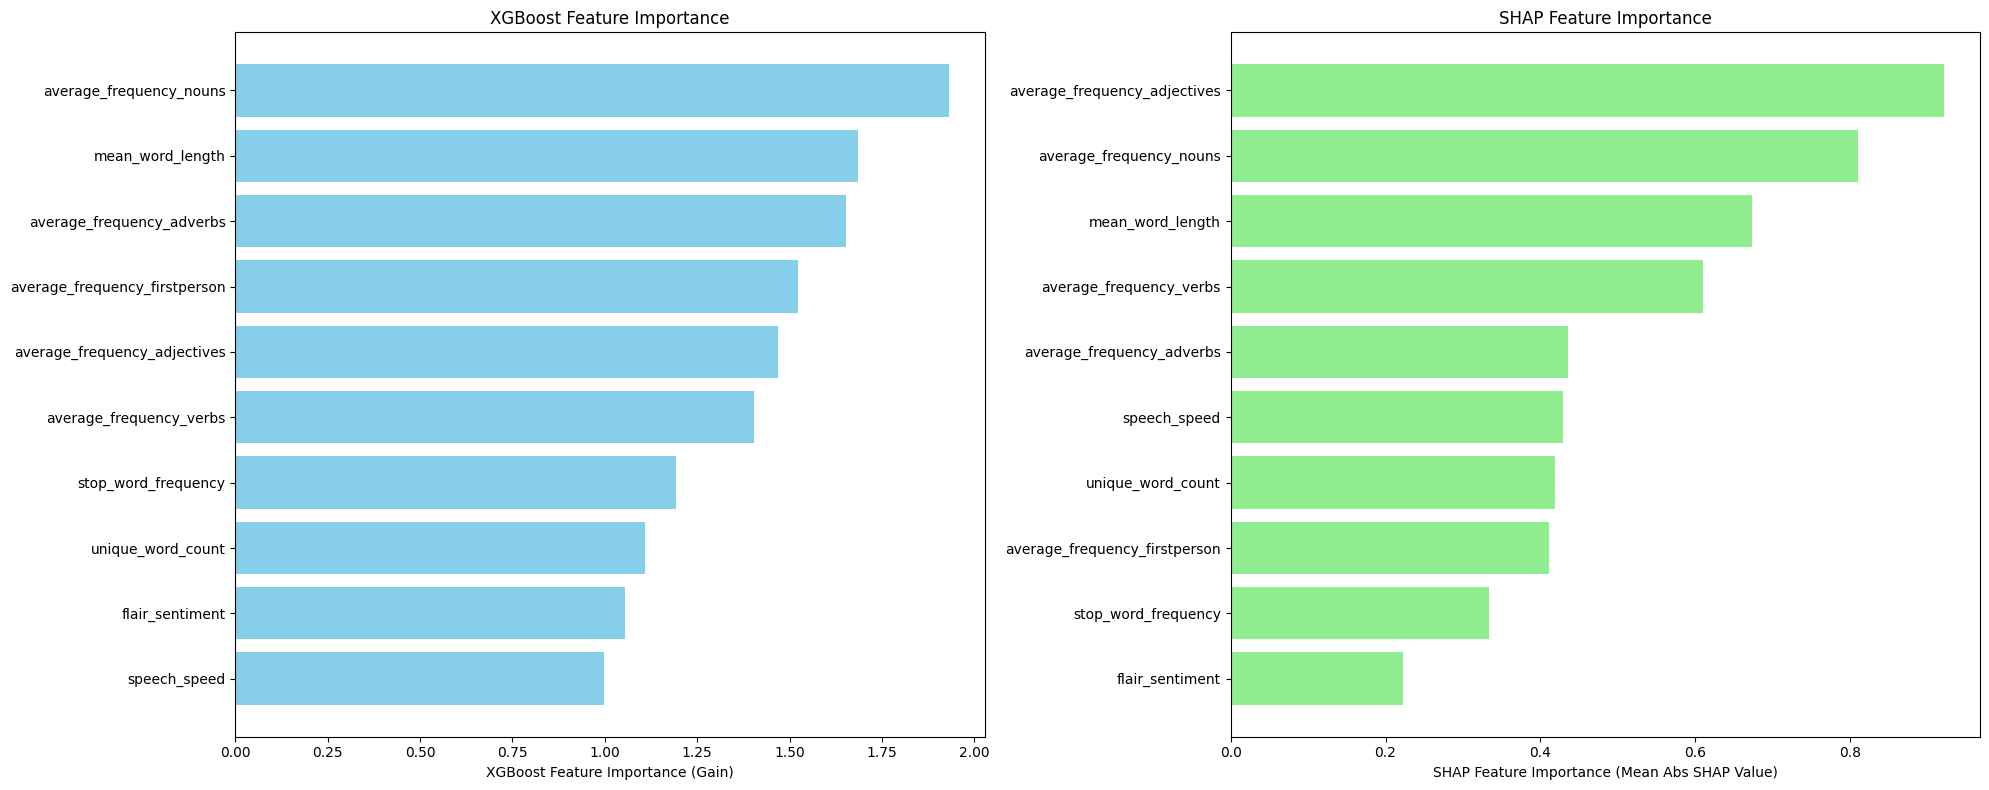

Top 5 Features from SHAP:
['average_frequency_adjectives', 'average_frequency_nouns', 'mean_word_length', 'average_frequency_verbs', 'average_frequency_adverbs']
Top 5 Features from XGBoost:
['average_frequency_nouns', 'mean_word_length', 'average_frequency_adverbs', 'average_frequency_firstperson', 'average_frequency_adjectives']
Consistent Top Features (from both SHAP and XGBoost): {'average_frequency_adverbs', 'average_frequency_nouns', 'mean_word_length', 'average_frequency_adjectives'}


In [29]:
# Compare SHAP and Built-in Feature Importance
# Map feature importances to the feature names
importance_df_xgb = pd.DataFrame({
    'Feature': [feature_names[int(f[1:])] for f in feature_importances.keys()],  # Map f0, f1, ... to names
    'Importance': list(feature_importances.values())
})
# Sort XGBoost feature importance
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)


# Calculate global SHAP feature importance (mean absolute SHAP values)
shap_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(shap_values.values).mean(axis=0)  # Mean absolute SHAP values
})
# Sort SHAP feature importance
shap_importance = shap_importance.sort_values(by='Importance', ascending=False)

# Create a 1-row, 2-column grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Adjust figsize for better display

# Plot XGBoost Feature Importance on the first subplot (axes[0])
axes[0].barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'], color='skyblue')
axes[0].set_xlabel("XGBoost Feature Importance (Gain)")
axes[0].set_title("XGBoost Feature Importance")
axes[0].invert_yaxis()  # Flip the chart for better readability

# Plot SHAP Feature Importance on the second subplot (axes[1])
axes[1].barh(shap_importance['Feature'], shap_importance['Importance'], color='lightgreen')
axes[1].set_xlabel("SHAP Feature Importance (Mean Abs SHAP Value)")
axes[1].set_title("SHAP Feature Importance")
axes[1].invert_yaxis()  # Flip the chart for better readability

# Display the plots side by side
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# --- Programmatically Compare Top N Features ---
top_n = 5

# Get top N features from both SHAP and XGBoost
top_shap_features = shap_importance.head(top_n)['Feature'].tolist()
top_xgb_features = importance_df_xgb.head(top_n)['Feature'].tolist()

# Display the top features from SHAP and XGBoost
print(f"Top {top_n} Features from SHAP:")
print(top_shap_features)

print(f"Top {top_n} Features from XGBoost:")
print(top_xgb_features)

# Check for consistency (intersection of top features)
consistent_features = set(top_shap_features) & set(top_xgb_features)
print(f"Consistent Top Features (from both SHAP and XGBoost): {consistent_features}")

In [30]:
# Initialize the LIME explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    X_train,  # Use X_train directly, which is already a numpy.ndarray
    feature_names=feature_names,  # Feature names
    class_names=['Not Depressed', 'Depressed'],  # Class names for classification
    mode='classification'  # Set mode to classification
)

# Explain a single prediction (e.g., for the 10th test sample)
explanation = lime_explainer.explain_instance(
    X_test[10],  # Directly use numpy array (no need for .iloc or .values)
    best_xgb_model.predict_proba,  # Model's probability prediction function
    num_features=10  # Number of features to display in the explanation
)

# Visualize the explanation
explanation.show_in_notebook()

NameError: name 'lime_tabular' is not defined

In [ ]:
# Extract the feature names and their corresponding contribution values
features = [x[0] for x in explanation.as_list()]
contributions = [x[1] for x in explanation.as_list()]

# Plot the contributions using matplotlib
plt.figure(figsize=(10, 6))

# Bar plot of feature contributions
plt.barh(features, contributions, color='skyblue')

# Set axis labels and title
plt.xlabel('Contribution to Prediction', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('LIME Explanation: Feature Contributions', fontsize=14)

# Set background color of the plot and text color
plt.gcf().set_facecolor('white')  # Set figure background color
plt.gca().set_facecolor('white')  # Set axes background color
plt.gca().tick_params(axis='both', labelcolor='black')  # Set tick labels color

# Add text labels to the bars
for i, v in enumerate(contributions):
    plt.text(v + 0.05, i, f'{v:.2f}', color='black', va='center')

plt.show()
